# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2024

Мягкий дедлайн: 22.12.2024 23:59 MSK

Жёсткий дедлайн: 22.12.2024 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг. Однако с большой силой приходит и большая ответственность, так что заодно научимся, как его правильно готовить

In [44]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split

sns.set(style='darkgrid')
filterwarnings('ignore')

In [45]:
X = load_npz('x.npz')
y = np.load('y.npy')

In [46]:
y[y == 0] = -1

Разделим на обучающую, валидационную и тестовую выборки (оставьте `random_state=1337` для воспроизводимости).

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=1337)

X_train.shape, X_valid.shape, X_test.shape

((18825, 169), (2354, 169), (2353, 169))

---

## Задание 1. Базовый градиентный бустинг (4 балла)

Первая часть посвящена реализации собственного градиентного бустинга. Обращаем внимание, что пользоваться готовыми реализациями <font color='lightcoral'>**нельзя**</font>, если специально не оговорено. На все <font color='plum'>**вопросы**</font> должен быть <font color='plum'>**ответ**</font>. В заданиях есть референсы для параметров, которые нужно сделать, на случай, если объяснение из ноутбука непонятно, тогда советуем обратиться к соответствующей документации

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

Обязательные параметры:
 — `base_model_class` — класс базовой модели нашего бустинга
 — `base_model_params` — словарь с гиперпараметрами для базовой модели
 — `n_estimators` — какое количество базовых моделей нужно обучить
 — `learning_rate` — темп обучения, должен быть из полуинтервала $(0, 1]$

#### `fit`

В `fit` приходит выборка, на которой мы обучаем новые базовые модели

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на выборке (используем `loss_fn` для этого) и найти новую оптимальную гамму

После всего цикла обучения надо нарисовать график (если `plot=True`).

#### `partial_fit`

В `partial_fit` приходит обучающая выборка, на которую обучается новая базовая модель

#### `predict_proba`

В `predict_proba` приходит любая выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду

#### `plot_history`

В `plot_history` приходит любая выборка, для которой последовательно считаются значения функции потерь и/или любой метрики, которую вы хотите посчитать, путем последовательного применения базовых моделей. Можно делать сразу во время обучения, можно делать иначе

In [48]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
%autoreload 2

from boosting import Boosting

### Проверка кода

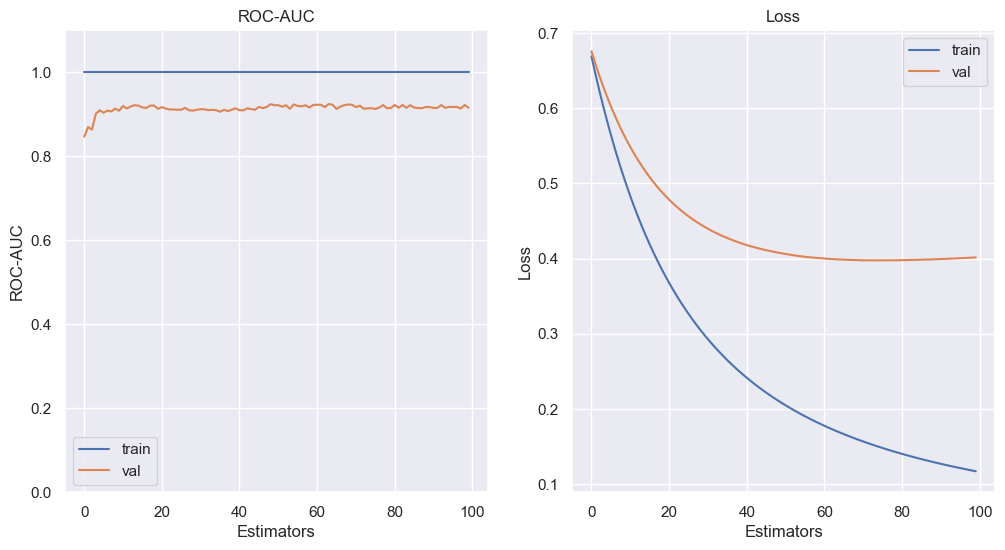

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9223
Test ROC-AUC 0.9184


In [7]:
boosting = Boosting(n_estimators=100)

boosting.fit(X_train, y_train, X_valid, y_valid)
boosting.plot_history(X_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

---

## Задание 2. Имплементация гиперпараметров (2.5 балла + 3.5 бонус)

Бустинг, как метод агрегации, предлагает несколько вариантов регуляризации безотносительно базовой модели. В этом пункте предлагается имплементировать часть из них. При необходимости можете обратиться к реализациям в вашей любимой библиотеке, там могут быть дополнительные пояснения и/или ссылки на оригинальные статьи

<font color='lightcoral'>**Важно!**</font> После добавления каждого параметра проверьте, как это повлияет на качество. Специально крутить параметры не нужно, но важно увидеть, что перформанс модели изменился, в худшую или в лучшую сторону, для этого какие-то параметры нужны, пусть и от балды, <font color='lightcoral'>**дефолтные параметры не подойдут**</font>, они скорее для референса. Лучше всего это видно по графикам обучения <font color='lightcoral'>**на трейне и валидации**</font>, рекомендуется смотрить именно на них

### 2.1. Борьба с переобучением (0.5 балла)

Как известно, бустинги бывают склонны к переобучению. Чтобы этого не допустить, можно контролировать процесс обучения и проверять критерий останова на валидации. Реализуйте такую процедуру, не забудьте, что всю предобработку, что вы будете делать для трейна, нужно будет повторить на валидации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| <td colspan=3>`early_stopping_rounds`, `eval_set` |

Добавьте параметры:
- `early_stopping_rounds: int | None = 0` — число раундов для критерия останова. Если качество ухудшается на протяжении всех раундов подряд, останавливаем обучение
- `X_val`, `y_val` или `eval_set: Tuple[np.ndarray] | None = None` — валидацонная выборка, на которой будем проверять переобучение

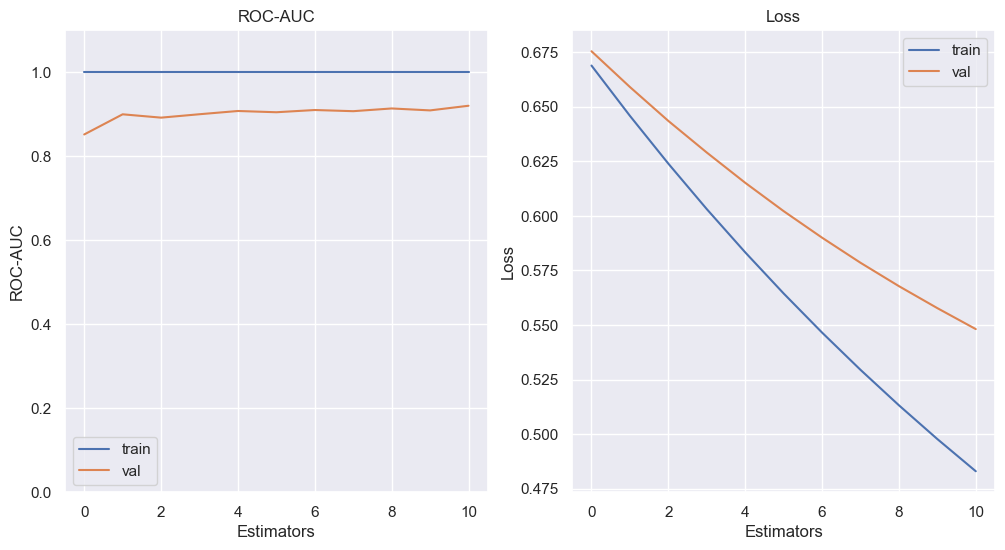

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9236
Test ROC-AUC 0.9218


In [8]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
boosting = Boosting(n_estimators=100, early_stopping_rounds=10)

boosting.fit(X_train, y_train, X_valid, y_valid)
boosting.plot_history(X_valid, y_valid)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

### Бонус. Бустинг линейных моделей (0.5 балла)

**<font color='plum'>Вопрос:** что произойдет при ансамблировании линейных моделей? Имеет ли это смысл?</font>

<font color='plum'>**Ответ:** за счёт линейных моделей можно снизить разброс, тем самым улучшив качество модели. </font>

Давайте убедимся. Обучите бустинг, где в качестве базовой модели будет линейная регрессия. Обязательно сохраните историю функции потерь и зафиксируйте время обучения. Можно взять уже готовый из <font color='lightblue'>**XGBoost**</font>, но будьте готовы разобраться с тем, как оттуда достать историю обучения

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="gblinear")` | — | — |

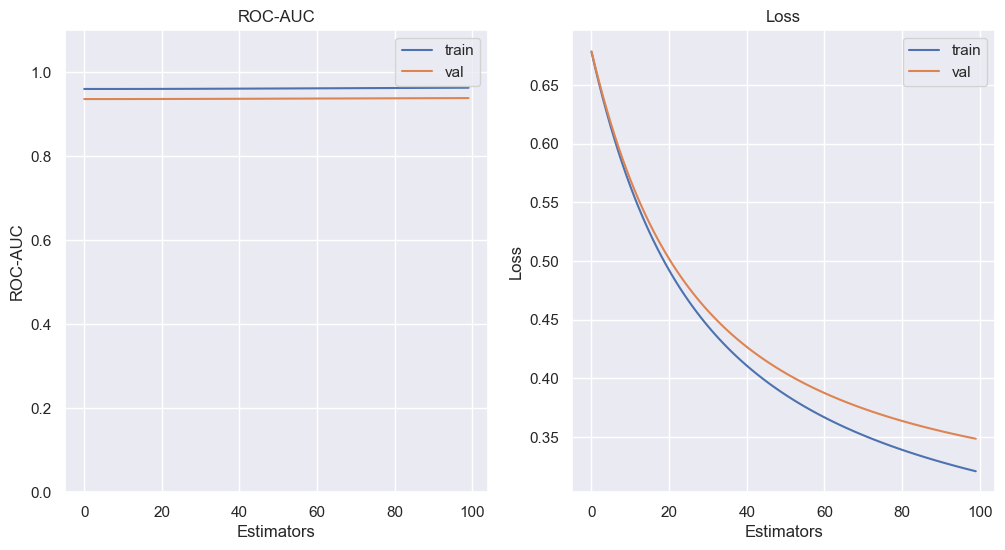

Train ROC-AUC 0.9632
Valid ROC-AUC 0.9385
Test ROC-AUC 0.9338


In [9]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
from sklearn.linear_model import LinearRegression
boosting = Boosting(n_estimators=100, base_model_class=LinearRegression)

boosting.fit(X_train, y_train, X_valid, y_valid)
boosting.plot_history(X_valid, y_valid)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

Теперь возьмите `sklearn.linear_model.SGDClassifier` иобучите на тех же данных. Не забудьте вытащить историю функции потерь

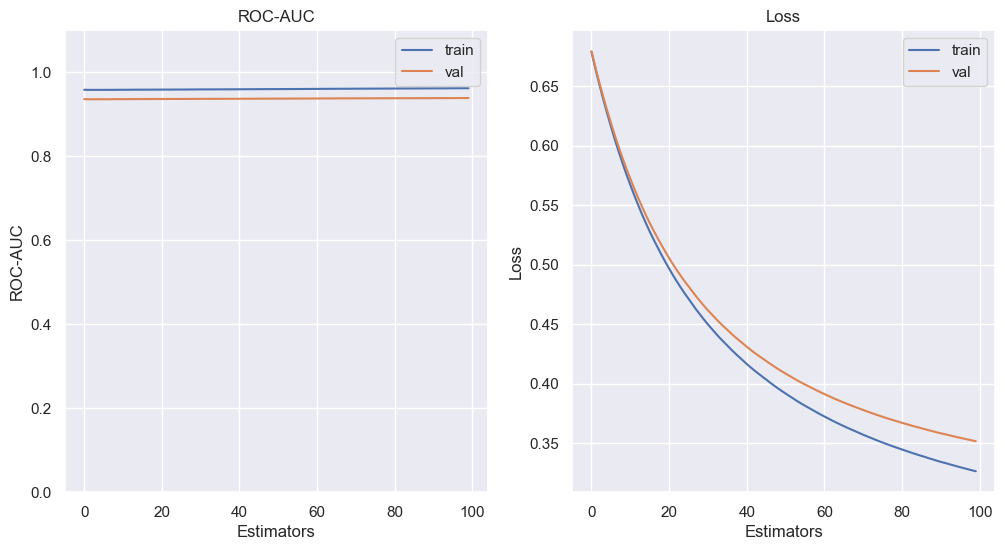

Train ROC-AUC 0.9619
Valid ROC-AUC 0.9386
Test ROC-AUC 0.9331


In [10]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
from sklearn.linear_model import SGDRegressor

boosting = Boosting(n_estimators=100, base_model_class=SGDRegressor)

boosting.fit(X_train, y_train, X_valid, y_valid)
boosting.plot_history(X_valid, y_valid)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

Покажите на одном графике изменение функции потерь для бустинга и SGD классификатора. Сравните следующие детали у бустинга и линейной модели:

- время обучения
- сходимость (как быстро, как стабильно и прочее)
- графики функции потерь на трейне и на валидации

In [11]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
boosting = Boosting(n_estimators=100)
boosting.fit(X_train, y_train, X_valid, y_valid)
h1 = boosting.history

In [12]:
boosting = Boosting(n_estimators=100, base_model_class=LinearRegression)
boosting.fit(X_train, y_train, X_valid, y_valid)
h2 = boosting.history

In [13]:
boosting = Boosting(n_estimators=100, base_model_class=SGDRegressor)
boosting.fit(X_train, y_train, X_valid, y_valid)
h3 = boosting.history

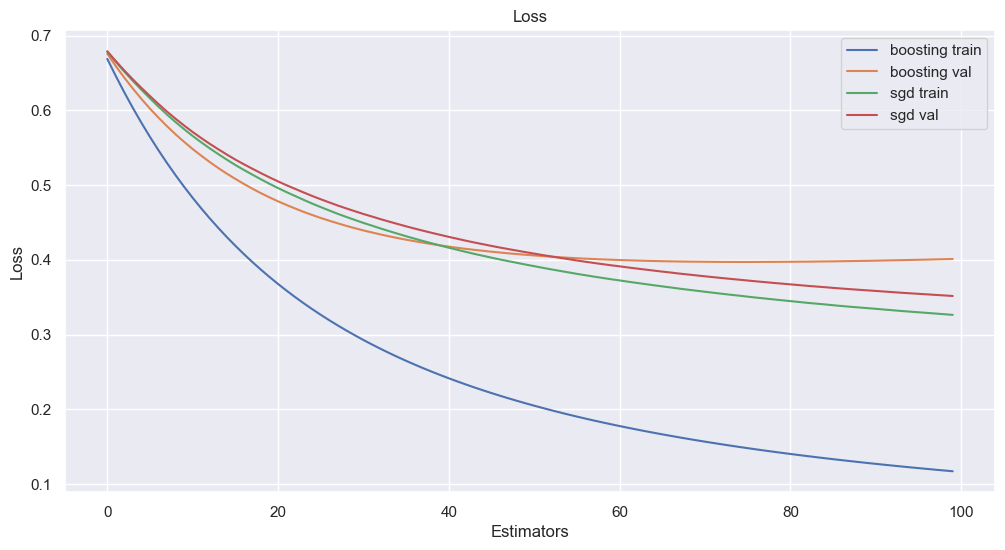

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(h1['train_loss'], label='boosting train')
if 'val_loss' in h1:
    plt.plot(h1['val_loss'], label='boosting val')
plt.plot(h3['train_loss'], label='sgd train')
if 'val_loss' in h3:
    plt.plot(h3['val_loss'], label='sgd val')
plt.xlabel('Estimators')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()

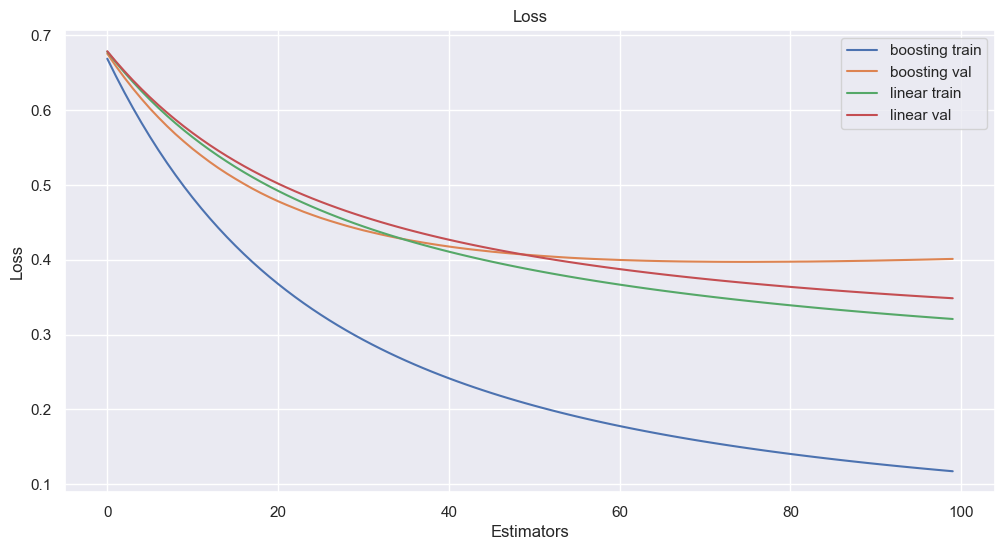

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(h1['train_loss'], label='boosting train')
if 'val_loss' in h1:
    plt.plot(h1['val_loss'], label='boosting val')
plt.plot(h2['train_loss'], label='linear train')
if 'val_loss' in h2:
    plt.plot(h2['val_loss'], label='linear val')
plt.xlabel('Estimators')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()

<font color='plum'>**Вопрос:** Какой вывод вы можете сделать?</font>

<font color='plum'>**Ответ:** однозначно, что обычный бустинг переобучается гораздо сильнее, чем любой из этих двух методов, а ошибка на валидации хуже. По времени `SGD` (2.6 секунды) и `Linear` (4.3 секунды) лучше чем простой бустинг (13 секунд), однако в литеры по времени выбился `SGD` очев. В целом, по качеству `Linear` почти не отличается от `SGD`, разве что чуть медленней.</font>

### 2.2. Бутстрап (0.5 балла)
Как известно, при обучении базовых алгоритмов в беггинге, используется бутстрапированная выборка. Звучит хайпово, почему бы не попробовать сделать то же самое в бустинге?

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `subsample`, — | `subsample`, `bagging`| `subsample`, `bootstrap_type`|

Вам нужно реализовать параметры:
- `subsample: float | int = 1.0` — доля или число объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей). Соответствует бутстрапу типа `Bernoulli`. Каждый объект либо входит в подвыборку, либо нет
- `bagging_temperature: float | int = 1.0` — веса объектов, которые попадают в выборку. Соответствует бутстрапу типа `Bayesian`. Каждый объект имеет определенный вес $t$, на который впоследствии домножается по формуле $w = (-\log(X))^t$, где $X \sim {U[0, 1]}$, после чего попадает в выборку. Таким образом можно сделать симуляцию повторений
- `bootstrap_type: str | None = 'Bernoulli'` — тип бутстрапа

<font color='plum'>**Вопрос:** как бутстрап может помочь в обучении с точки зрения смещения, разброса и вообще?</font>

<font color='plum'>**Ответ:** Это дополнительная рандомизация и снижение разброса, очевидно. Тем самым мы повышаем устойчивость нашей модели. </font>

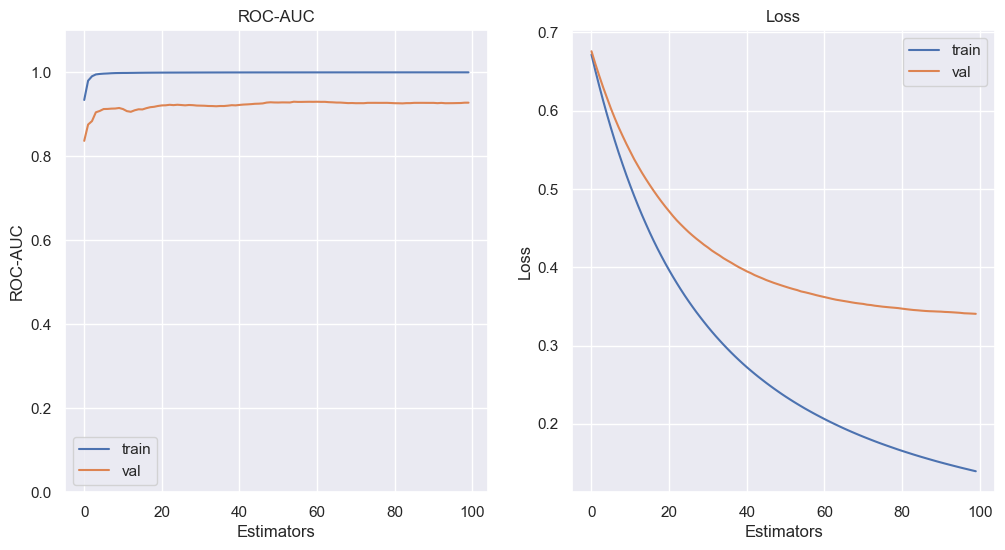

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9275
Test ROC-AUC 0.9219


In [16]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
boosting = Boosting(
    n_estimators=100,
    subsample=0.8,
    bagging_temperature=0.5,
    bootstrap_type='Bayesian'
)

boosting.fit(X_train, y_train, X_valid, y_valid)
boosting.plot_history(X_valid, y_valid)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

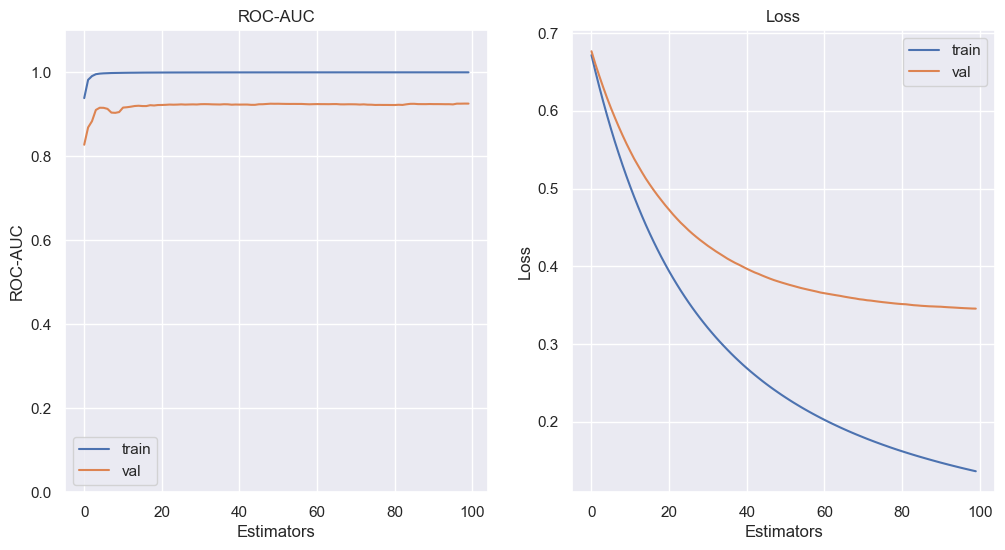

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9253
Test ROC-AUC 0.9190


In [17]:
boosting = Boosting(
    n_estimators=100,
    subsample=0.8,
    bagging_temperature=0.5,
    bootstrap_type='Bernoulli'
)

boosting.fit(X_train, y_train, X_valid, y_valid)
boosting.plot_history(X_valid, y_valid)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

### Бонус. GOSS (0.5 балла)

Заметим, что во время обучения не все объекты одинаково важны. Один из вариантов это исправить — ввести какие-то веса на объекты, однако можно пойти чуть хитрее. В <font color='lightgreen'>**LightGBM**</font> придумали подход [Gradient-based One-side Sampling](https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf)

Давайте оценивать важность объектов в отдельный момент обучения нового дерева. Будем считать, какой антиградиент привносит каждый объект. Далее разобъем градиенты на 2 группы. Объекты с большими градиентами берутся все, с маленькими — только часть, по аналогии с бутстрапом, с отрицательными — выкидываются. И не забываем домножить на фактор, чтобы учесть выкинутые объекты. Подробнее в статье

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | `bagging='goss'`| `bootstrap_type='MVS'`|

Параметры, которые нужно сделать:

- `goss: bool | None = False` — GOSS бустинг или нет
- `goss_k: float | int = 0.2` — доля объектов, градиенты которых будем считать большими. Все остальное — маленькими
- `subsample: float | int = 0.3` — параметры сэмплинга для маленьких градиентов из пункта 2.1

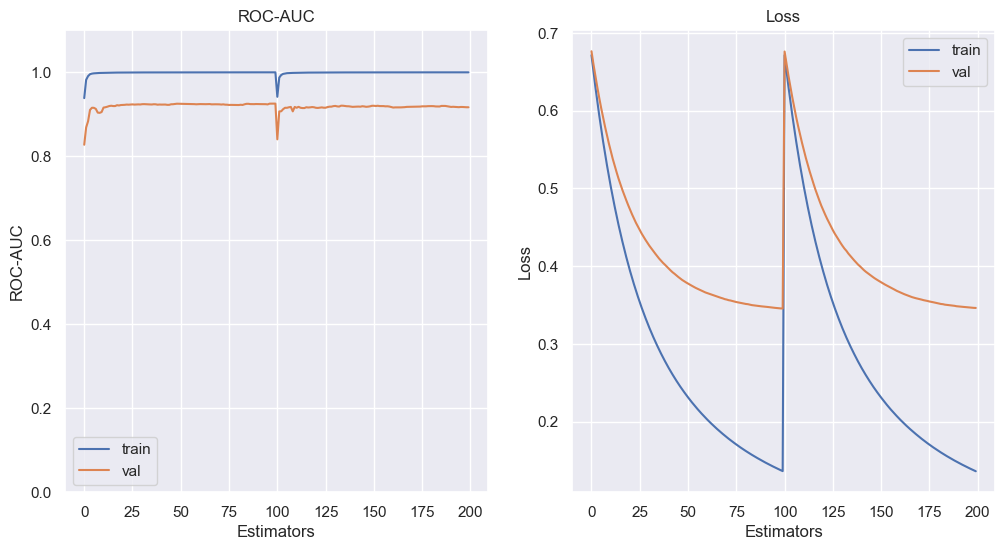

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9262
Test ROC-AUC 0.9226


In [18]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
model = Boosting(n_estimators=100,
                 subsample=0.8,
                 goss=True,
                 goss_k=0.25)

boosting.fit(X_train, y_train, X_valid, y_valid)
boosting.plot_history(X_valid, y_valid)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

### 2.3. Работа с признаками (1 балл)

1. Помимо выбора случайных объектов, есть идея выбирать случайное подмножество признаков, заложенная в Random Forest. Мотивация это делать точно та же самая, что и в бутстрапировании, за это будет отвечать `rsm`

2. С другой стороны, вместо того, чтобы выкидывать признаки, можно попробовать проредить их множество значений, применив бинаризацию. В идеале это стоит делать с датасетом до обучения модели, но не обязательно, можно, например, на этапе `fit`, а в `partial_fit` приходит уже квантизованный датасет. Для этого существует множество алгоритмов, мы предлагаем сделать два наиболее простых:

- $\text{Uniform}$. Значения признака $[\min f_i, \max f_i]$ отображаются в `nbins` отрезков одинаковой длины, которые полностью покрывают интервал
- $\text{Quantile}$. Тот же самый отрезок сортируется и бьется на `nbins` квантилей от 0 до 1

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `colsample_bytree`, `tree_method` | `colsample_bytree`, `max_bin`| `rsm`, `quantize(...)`|

Нужно добавить параметры:
- `rsm: float | int = 1.0` — доля или число признаков, участвующих в обучении модели. Каждый признак либо входит, либо не входит в пул, на котором обучается базовый алгоритм, по аналогии с бутстрапом Бернулли
- `quantization_type: str | None = None` — тип квантизации, если она есть
- `nbins: int = 255` — число бинов для квантизации. Игнорируем, если тип квантизации не указан

<font color='plum'>**Вопрос**: как квантизация поможет в обработке выбросов и нанов?</font>

<font color='plum'>**Ответ**: ... </font>

<font color='plum'>**Вопрос**: можно ли просто заполнить наны каким-то числом? Имеет ли значение, что это за число (-1, -100, -1e32)?</font>

<font color='plum'>**Ответ**: ... </font>

### Бонус. Квантизация (1.5 балл)

В текущих имплементациях бустинга используются более сложные методы квантизации. К сожалению, способы выше страдают либо от неравноправности бинов — в каких-то объектов больше, в каких-то меньше, либо от того, что целевая переменная от бинов зависит опосредованно. Предлагается это исправить следующими способами:

1. $\text{MinEntropy}$. Это [один из методов](https://catboost.ai/docs/en/concepts/quantization), который используется для бинаризации в <font color='palegoldenrod'>**CatBoost**</font>, остальные на него очень похожи. Будем жадно набирать бины так, чтобы энтропия объектов внутри ($\sum_{i \in \text{bin}} x_i\log(x_i)$) была как можно меньше. Сделать такое разбиение руками непросто, но вам эта задача должна что-то напоминать
   
2. $\text{PiecewiseEncoding}$. Это относительно свежий метод для [табличных трансформеров](https://arxiv.org/pdf/2203.05556). Суть заключается в том, что бины для квантизации будем брать не с потолка, а именно те, что нужны для разбиения таргета. (В статье делается кодирование в вектор длины $T$, где $T$ число бинов, в нашем случае это излишне, бинов можно оставить столько же, но взять лмшь закодированную по формуле часть)

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | — | `feature_border_type="Piecewise"` |

Нужно добавить опцию:

- `'MinEntropy'` для `quantization_type` — какую квантизацию используем

Реализуйте оба способа подсчета (или один, но тогда балл неполный) и сравните, удалось ли улучшить качество?

In [19]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 2.4. Важность признаков (0.5 балла)

Поскольку наша базовая модель — это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными — иначе вы что-то сделали не так). Разумеется, способ не единственный, если хочется, посмотрите в документации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `model.get_score()` | `lightgbm.importance()` | `model.get_feature_importance()` |

Допишите к бустингу:
- `feature_importances_` — атрибут, который возвращает важность признаков, согласно методу выше

In [20]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
boosting = Boosting(n_estimators=100)
boosting.fit(X_train, y_train, X_valid, y_valid)

importance_dict = boosting.feature_importances_()

Покажите, какие признаки оказались самыми важными

In [21]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
ind = np.argsort(np.array(list(importance_dict.values())))
imp = np.array(list(importance_dict.keys()))[ind]
for x in imp[-4:]:
    print(f"Model index: {x}, Importance: {importance_dict[x]}")
print("Length of the importance dict:", len(importance_dict))

Model index: 168, Importance: 0.028541408417309056
Model index: 165, Importance: 0.031052361683016845
Model index: 164, Importance: 0.1761738572553791
Model index: 166, Importance: 0.5633545454627706
Length of the importance dict: 169


### Бонус. DART (1.5 балла)

Ранее мы обсуждали, что каждый базовый алгоритм пытается исправить ошибки всего предыдущего ансамбля. Из-за этого возникает неравноправие — каждая новая модель вносит все меньший и меньший вклад. Уверенные обучатели нейросетей знают, что это может привести к переобучению. Но выход есть, и выход этот [DART](https://arxiv.org/pdf/1505.01866)!

В DL есть такой вид регуляризации, как dropout, когда некоторые узлы нейросети со случайным шансом отключаются. Можно попробовать обобщить этот подход на случай бустингов и случайно выкидывать деревья из композиции во время обучения

1. Выбираем, какие деревья убрать. При подсчете антиградиента берем не весь ансамбль, а только ту часть, что осталась
2. Домножаем выходы дерева на $1/k$, где $k$ — число удаленных деревьев, чтобы учесть тот факт, что ансамбль был не весь. Тогда вклад отдельного дерева будет не настолько большим
3. Домножаем выходы выкинутых деревьев на $k/(k+1)$, чтобы масштабы выходов примерно совпадали

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="dart")` | `LGBMClassifier(boosting_type="dart")` | — |

Параметры, которые нужно добавить:

- `dart: bool | None = False` — DART бустинг или нет
- `dropout_rate: int | float = 0.05` — доля деревьев, которую выкидываем во время обучения DART

In [22]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

------

## Задание 3. Оптимизация (3.5 балла + 0.5 бонус)

Теперь давайте подумаем, как же правильно применять бустинги. Нас интересует: какие бустинги вообще бывают, как их правильно тюнить, и как интерпретировать

Оптимизация моделей с большим числом гиперпараметров это сложное дело. Нетрудно догадаться, что в случае, когда параметров $m$, сложность перебора в самом худшем случае будет порядка $n^m$. У бустингов, хотя на самом деле не только, эта проблема стоит особенно остро. Подумаем, как это делать умнее

### 3.1. Знакомство с optuna (1 балл)

Для эффективного подбора гиперпараметров существует несколько решений, основанных на байесовской оптимизации. В этом задании предлагается познакомиться с библиотекой [optuna](https://optuna.org/), которая делает перебор гиперпараметров легким и приятным, а также сохраняет всю историю экспериментов в одно место за вас

Подберите на валидации оптимальные значения следующих гиперпараметров для вашей реализации бустинга:
- `max_depth`
- `n_estimators`
- `learning_rate`
- любые другие параметры, которые вам понравились

Заметим, что оптуна это крайне гибкая библиотека, в которой можно реализовать абсолютно любую логику, которую пожелаете. За вас там есть лишь выбор модели. Чтобы не плодить несколько `objective`, можно слегка менять тело функции, например, добавить опциональные параметры, но шаблоном пользоваться не обязательно, как обычно

Подберите диапазон параметров самостоятельно, не забывайте фиксировать сид (нет, его не нужно перебирать). Сохраните и покажите оптимальный набор параметров. Сравните графики функций потерь для оптимального и дефолтного бустингов. Покажите, какие параметры дали наибольший прирост (для этого придется почитать документацию оптуны)

In [60]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
from sklearn.tree import DecisionTreeRegressor
import time

def objective(study):
    # параметры, общие для всех бустингов
    common_params = {
        'base_model_class': DecisionTreeRegressor,
        'base_model_params': {
            'max_depth': study.suggest_int('max_depth', 2, 42),
        },
        'n_estimators': study.suggest_int('n_estimators', 50, 200),
        'learning_rate': study.suggest_float('learning_rate', 0.01, 0.3),
    }
    # параметры для конкретной имплементации бустинга
    optional_params = {
        'base_model_params': {
            'min_samples_split': study.suggest_int('min_samples_split', 2, 100),
        },
    }
    
    optional_params = {}
    booster = Boosting(**common_params, **optional_params)
    booster.fit(X_train, y_train, X_valid, y_valid)
    
    val_loss = booster.history['val_loss'][-1]
    return val_loss
    # pass

In [61]:
import optuna 
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
best_params = study.best_params
print(f"Best parameters: {best_params}")

[I 2024-12-23 20:58:54,095] A new study created in memory with name: no-name-fcb53cf3-ff79-4aae-9620-7516b85acc3f


[I 2024-12-23 20:59:09,504] Trial 0 finished with value: 0.44420160822733074 and parameters: {'max_depth': 32, 'n_estimators': 119, 'learning_rate': 0.024958678440476147, 'min_samples_split': 50}. Best is trial 0 with value: 0.44420160822733074.
[I 2024-12-23 20:59:17,451] Trial 1 finished with value: 0.39717228723854636 and parameters: {'max_depth': 34, 'n_estimators': 62, 'learning_rate': 0.1305920446003241, 'min_samples_split': 74}. Best is trial 1 with value: 0.39717228723854636.
[I 2024-12-23 20:59:29,987] Trial 2 finished with value: 0.41910047939179484 and parameters: {'max_depth': 30, 'n_estimators': 98, 'learning_rate': 0.04069757667442205, 'min_samples_split': 14}. Best is trial 1 with value: 0.39717228723854636.
[I 2024-12-23 20:59:44,817] Trial 3 finished with value: 0.4587626880154382 and parameters: {'max_depth': 29, 'n_estimators': 115, 'learning_rate': 0.022205523630800528, 'min_samples_split': 82}. Best is trial 1 with value: 0.39717228723854636.
[I 2024-12-23 21:00:05

Best parameters: {'max_depth': 6, 'n_estimators': 156, 'learning_rate': 0.11864560556385165, 'min_samples_split': 28}


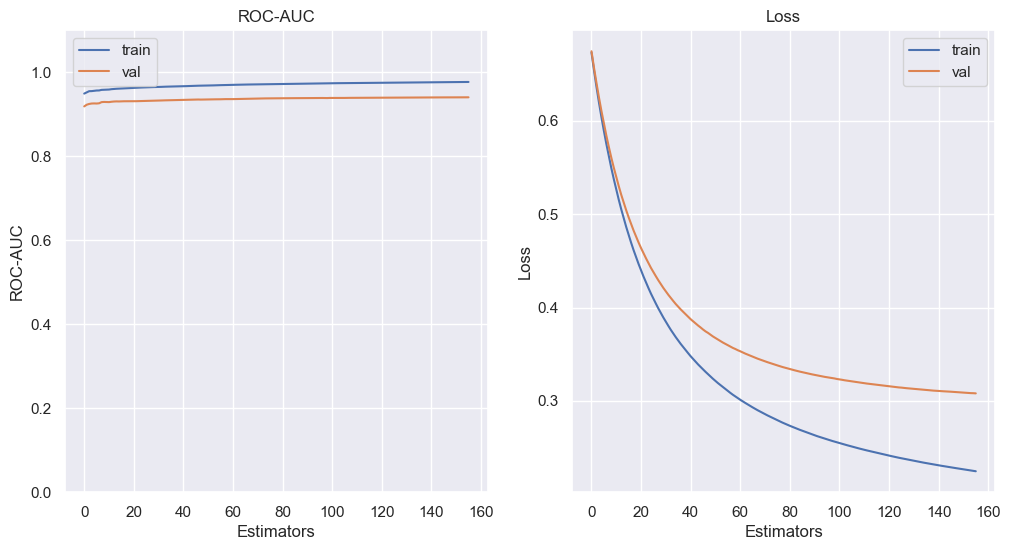

Train ROC-AUC 0.9769
Valid ROC-AUC 0.9403
Test ROC-AUC 0.9383


In [62]:
params = {'base_model_class': DecisionTreeRegressor,
        'base_model_params': {
            'max_depth': best_params['max_depth'],
            'min_samples_split': best_params['min_samples_split'],
        },
        'n_estimators': best_params['n_estimators'],
        'learning_rate': best_params['learning_rate'],
}
boosting = Boosting(**params)

boosting.fit(X_train, y_train, X_valid, y_valid)
boosting.plot_history(X_valid, y_valid)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

### 3.2. Глубокая оптимизация (1 балл)

Помимо эффективного перебора гиперпараметров, `optuna` предлагает более тонкий контроль над самой процедурой обучения. Улучшите процедуру оптимизации следующим образом:

1. Посмотрите, как в `optuna` устроена запись в хранилища, и добавьте это в пайплайн оптимизации. Без указания БД все запуски оптуны сотрутся, как только закончится сессия. Более того, так можно распараллелить процесс оптимизации на несколько машин
2. Посмотрите, как можно контролировать процесс обучения бустинга при помощи прунера. У библиотечных имплементаций есть уже готовые, их можно использовать пунктом ниже. Для кастомной модели возьмите что-то из `optuna.pruners`. Идея прунера — не обучать бустинг до конца, если по истории видно, что другие бустинги на этом этапе статистически лучше.
3. Добавьте сохранение истории функции потерь и времени обучения в качестве `user_attribute` сразу в `study`. Мы не хотим оптимизировать их напрямую, но они нам понадобится для сравнения моделей в дальнейшем

Добавьте хранилище и юзер атрибуты и посмотрите, ускорилась ли оптимизация с добавлением прунера

In [63]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 3.3. Готовые реализации (1 балл)

Библиотек для бустингов существует много, но активно используются лишь три. Ваша задача — попробовать их в деле, посмотреть на их уникальные фишки и понять, что вам нравится больше всего

Возьмите любую из популярных библиотек: <font color='lightblue'>`xgboost`</font>, <font color='lightgreen'>`lightgbm`</font>, <font color='palegoldenrod'>`catboost`</font>.
Ваша задача — взять одну из них, подобрать те же оптимальные параметры, что и выше, плюс что-то, что вам понравилось в них больше всего (может быть абсолютно любая фишка из пунктов выше или что-то, что вы найдете сами, не обязательно эксклюзивное), и сравнить две оптимизированные модели по
- динамике функции потерь (на обучающей и на валидационной выборке)
- времени обучения

In [64]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

param = {
    'max_depth': best_params['max_depth'],
    'eta': best_params['learning_rate'],
    'n_estimators': best_params['n_estimators'],
}

xgb_model = xgb.train(param, dtrain)

sigmoid = lambda x: 1 / (1 + np.exp(-x))
loss_fn = lambda y, z: -np.log(sigmoid(y * z)).mean()
xgb_pred = xgb_model.predict(dvalid)
xgb_loss = loss_fn(y_valid, xgb_pred)

print()
print("XGBoost loss:", xgb_loss)
print("Optuna Best Val Loss:", boosting.history['val_loss'][-1])

start_time_xgb = time.time()
xgb_model = xgb.train(param, dtrain)
end_time_xgb = time.time()

params = {'base_model_class': DecisionTreeRegressor,
        'base_model_params': {
            'max_depth': best_params['max_depth'],
            'min_samples_split': best_params['min_samples_split'],
        },
        'n_estimators': best_params['n_estimators'],
        'learning_rate': best_params['learning_rate'],
}

start_time_optuna = time.time()
booster = Boosting(**params)
booster.fit(X_train, y_train, X_valid, y_valid)
end_time_optuna = time.time()

print("XGBoost Training Time:", end_time_xgb - start_time_xgb )
print("Optuna Training Time:", end_time_optuna - start_time_optuna)


XGBoost loss: 0.4967336816768763
Optuna Best Val Loss: 0.3080535137654837
XGBoost Training Time: 0.008633852005004883
Optuna Training Time: 6.618020057678223


<font color='plum'>**Вопрос:** Какая архитектура вам нравится больше всего и почему?</font>

<font color='plum'>**Ответ**: несмотря на то, что ошибка получилась побольше в `xgboost`, он работает кратно быстрее, мне кажется, что в таком случае, можно слегка пренебречь ошибкой в угоду скорости. </font>

### Бонус. Random Forest (0.5 балла)

Если очень захотеть, оптуна может оптимизировать все, что угодно, даже нейросети. Давайте противопоставим бустингу его злейшего врага — алгоритм Random Forest.

Возьмите реализацию случайного леса из <font color='lightgreen'>`lightgbm`</font>. Посмотрите, какие там есть гиперпараметры, переберите что-либо из них вместе с `max_depth` и `n_estimators`.

Сравните его качество и динамику функции потерь (на обучающей и на валидационной выборке) с таковыми у бустинга и сделайте вывод, а нужен ли Random Forest?

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 3.4. Бустинг и вероятности (0.5 балла)

С качеством мы более-менее разобрались, но что насчет вероятностей? Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности?

In [59]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚from sklearn.linear_model import LogisticRegression


Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2025 года?

<img src="IMG_4495.jpg" width="400" height="600">

# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚